In [6]:
#import statements 
import glob
import pretty_midi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from miditok import REMI, TokenizerConfig


# Task 1 Code/Dataset Analysis
In this symbolic music generating task, the Maestro dataset was split into training and test subsets to support model training and evaluation. The goal of this project is to train a model that can learn the p(x) distribution of classical music sequences and then generate new, coherent sequences unconditionally. In this part, we are creating stats to analyze the dataset.


In [7]:
import os
import glob
train_files = glob.glob("./train/*.midi")
test_files = glob.glob("./test/*.midi")

train_paths = glob.glob("./train/*.midi")
test_paths = glob.glob("./test/*.midi")


print(f"Number of train MIDI files: {len(train_files)}")
print(f"Number of test MIDI files:  {len(test_files)}")

Number of train MIDI files: 938
Number of test MIDI files:  105


In [8]:
config = TokenizerConfig(
    num_velocities=32,           
        use_chords=True,            
        use_programs=False,         
        use_time_signatures=True,   
        use_rests=True, 
        use_tempos=True 
)
tokenizer = REMI(config)
tokenizer.train(vocab_size=5000, files_paths=train_files)
tokenizer.save("tokenizer.json")

Analyze Data Set through musical elements selected through musical elements

Training Set - Total tokens collected: 22315
Training Set - Number of pieces: 1


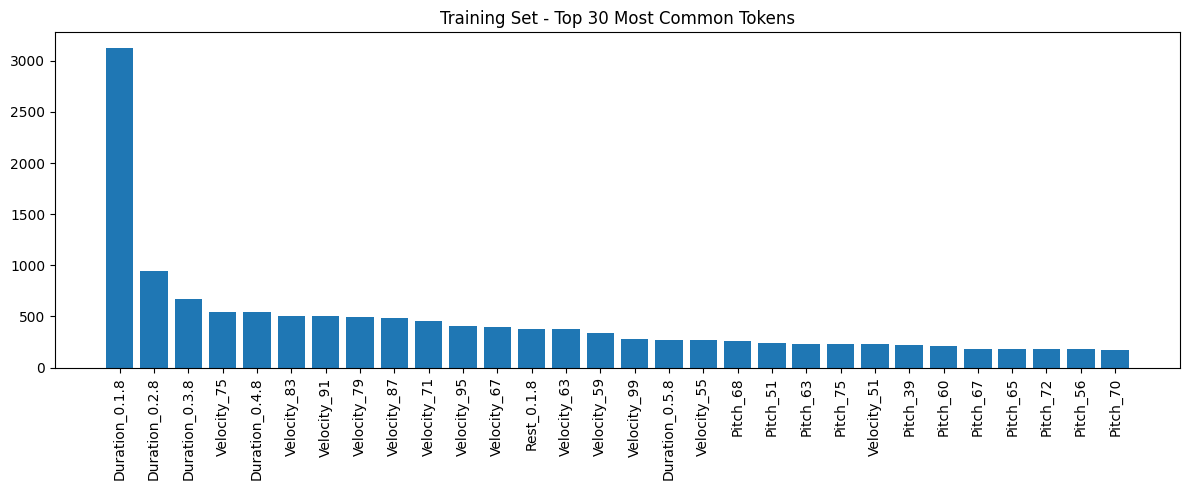

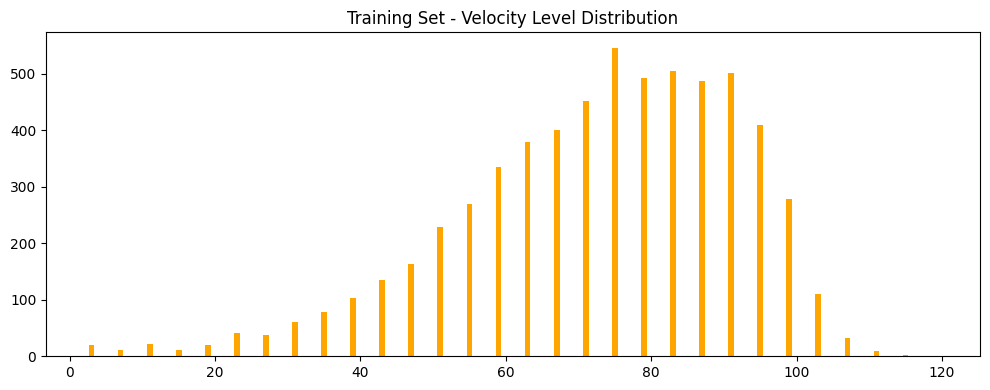

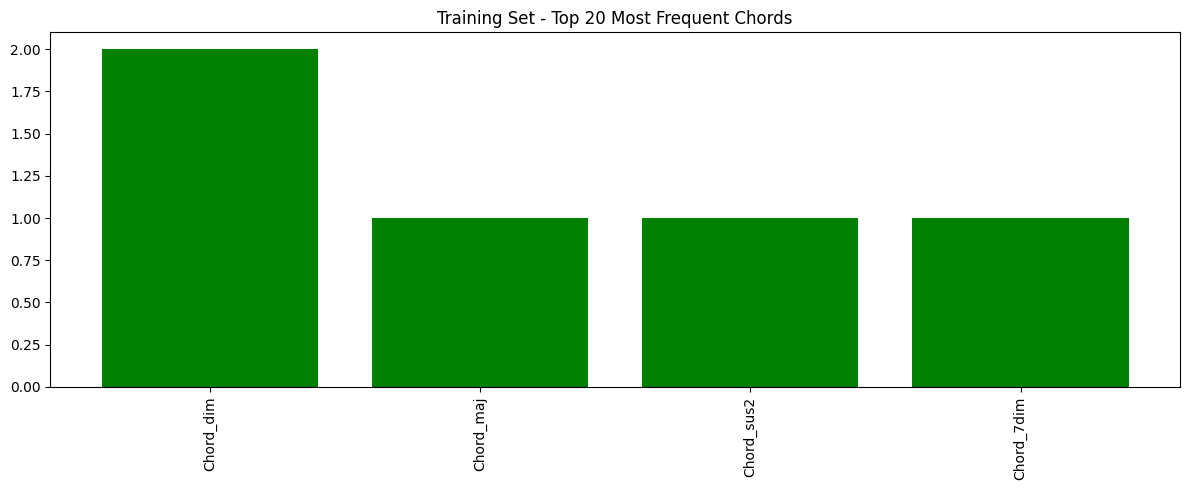

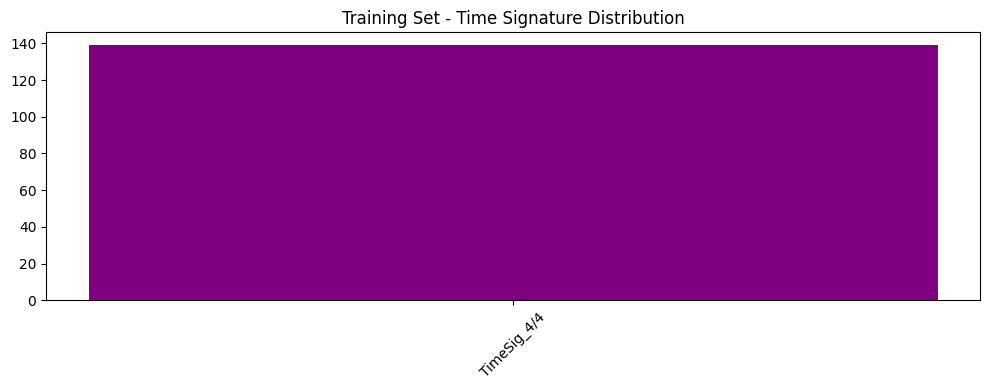

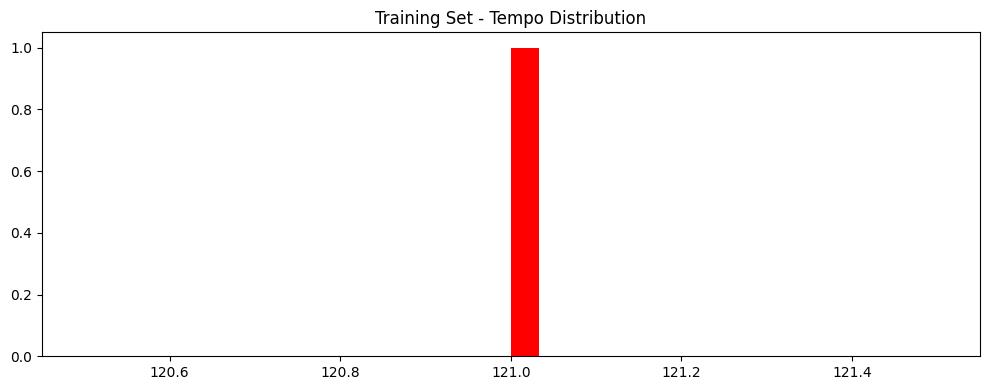

Test Set - Total tokens collected: 49594
Test Set - Number of pieces: 1


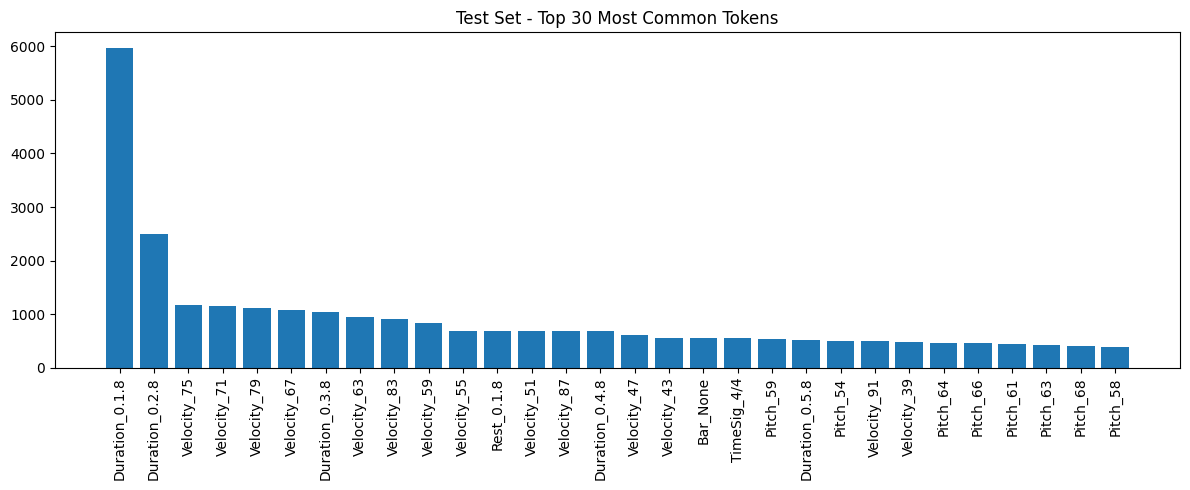

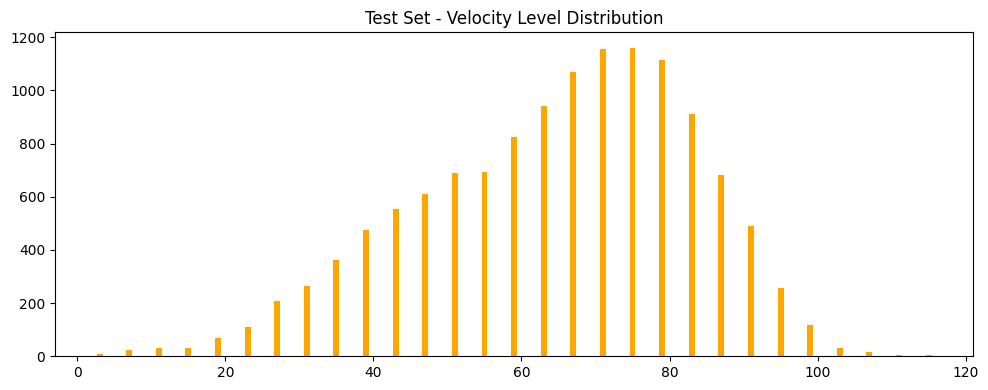

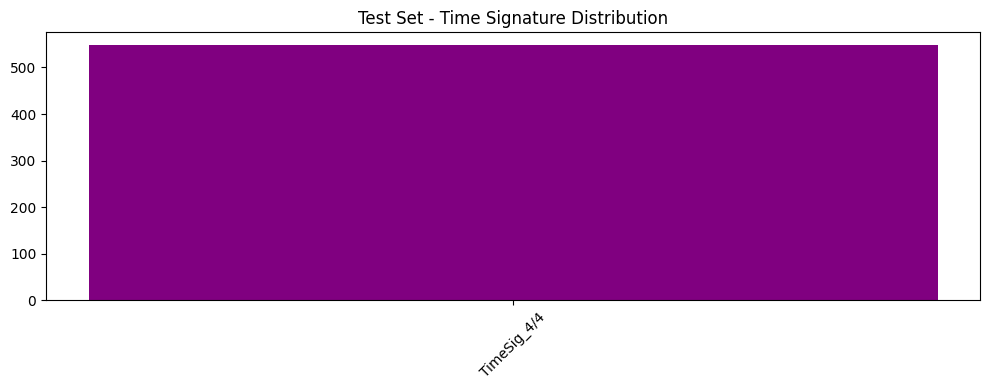

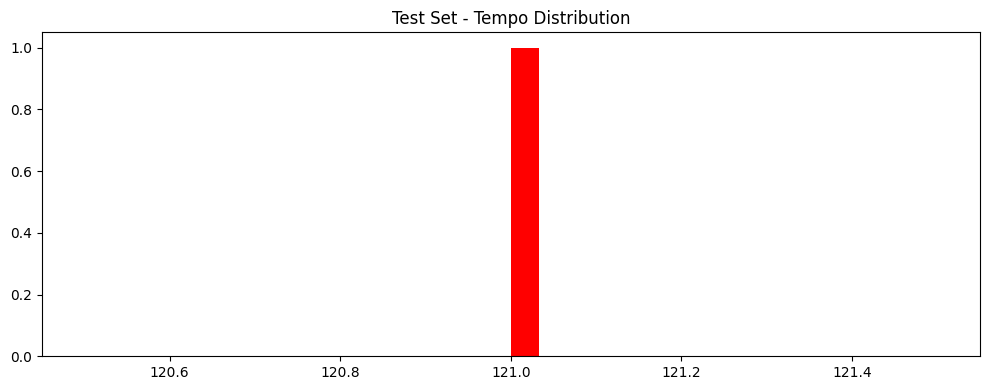

In [10]:
def analyze_dataset(file_list, tokenizer, dataset_name="Dataset"):
    all_tokens = []
    tokens_per_piece = []

    velocity_tokens = []
    chord_tokens = []
    timesig_tokens = []
    tempo_tokens = []
    sequence_lengths = []

    for file in file_list:
        try:
            token_seqs = tokenizer(file)  # list of TokenSequence
            tokens = [str(tok) for seq in token_seqs for tok in seq.tokens]
        except Exception as e:
            print(f"Failed to tokenize {file}: {e}")
        continue


    all_tokens.extend(tokens)
    tokens_per_piece.append(tokens)

    velocity_tokens.extend([t for t in tokens if t.startswith("Velocity_")])
    chord_tokens.extend([t for t in tokens if t.startswith("Chord_")])
    timesig_tokens.extend([t for t in tokens if t.startswith("TimeSig_")])
    tempo_tokens.extend([t for t in tokens if t.startswith("Tempo_")])

    sequence_lengths.append(len(tokens))

    print(f"{dataset_name} - Total tokens collected: {len(all_tokens)}")
    print(f"{dataset_name} - Number of pieces: {len(tokens_per_piece)}")

    # Plot: Top 30 tokens
    token_counts = Counter(all_tokens)
    common_tokens = token_counts.most_common(30)
    tokens, counts = zip(*common_tokens)
    plt.figure(figsize=(12, 5))
    plt.bar(tokens, counts)
    plt.xticks(rotation=90)
    plt.title(f"{dataset_name} - Top 30 Most Common Tokens")
    plt.tight_layout()
    plt.show()

    # Velocity
    if velocity_tokens:
        velocity_counts = Counter(velocity_tokens)
        velocities, counts = zip(*sorted([(int(t.split('_')[1]), c) for t, c in velocity_counts.items()]))
        plt.figure(figsize=(10, 4))
        plt.bar(velocities, counts, color='orange')
        plt.title(f"{dataset_name} - Velocity Level Distribution")
        plt.tight_layout()
        plt.show()

    # Chords
    if chord_tokens:
        chord_counts = Counter(chord_tokens)
        chords, counts = zip(*chord_counts.most_common(20))
        plt.figure(figsize=(12, 5))
        plt.bar(chords, counts, color='green')
        plt.xticks(rotation=90)
        plt.title(f"{dataset_name} - Top 20 Most Frequent Chords")
        plt.tight_layout()
        plt.show()

    # Time Signatures
    if timesig_tokens:
        timesig_counts = Counter(timesig_tokens)
        timesigs, counts = zip(*sorted(timesig_counts.items()))
        plt.figure(figsize=(10, 4))
        plt.bar(timesigs, counts, color='purple')
        plt.xticks(rotation=45)
        plt.title(f"{dataset_name} - Time Signature Distribution")
        plt.tight_layout()
        plt.show()

    # Tempo
    if tempo_tokens:
        tempo_values = [round(float(t.split('_')[1])) for t in tempo_tokens]
        plt.figure(figsize=(10, 4))
        plt.hist(tempo_values, bins=30, color='red')
        plt.title(f"{dataset_name} - Tempo Distribution")
        plt.tight_layout()
        plt.show()


# Run analysis
analyze_dataset(train_files, tokenizer, "Training Set")
analyze_dataset(test_files, tokenizer, "Test Set")